In [ ]:
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
#sparse_categorical_crossentropy/categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
hist = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_test, y_test))

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2008 - accuracy: 0.9408 - val_loss: 0.0978 - val_accuracy: 0.9696
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0802 - accuracy: 0.9754 - val_loss: 0.0923 - val_accuracy: 0.9725
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0850 - val_accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0355 - accuracy: 0.9885 - val_loss: 0.0682 - val_accuracy: 0.9785
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0764 - accuracy: 0.9797
테스트 정확도: 0.9797000288963318


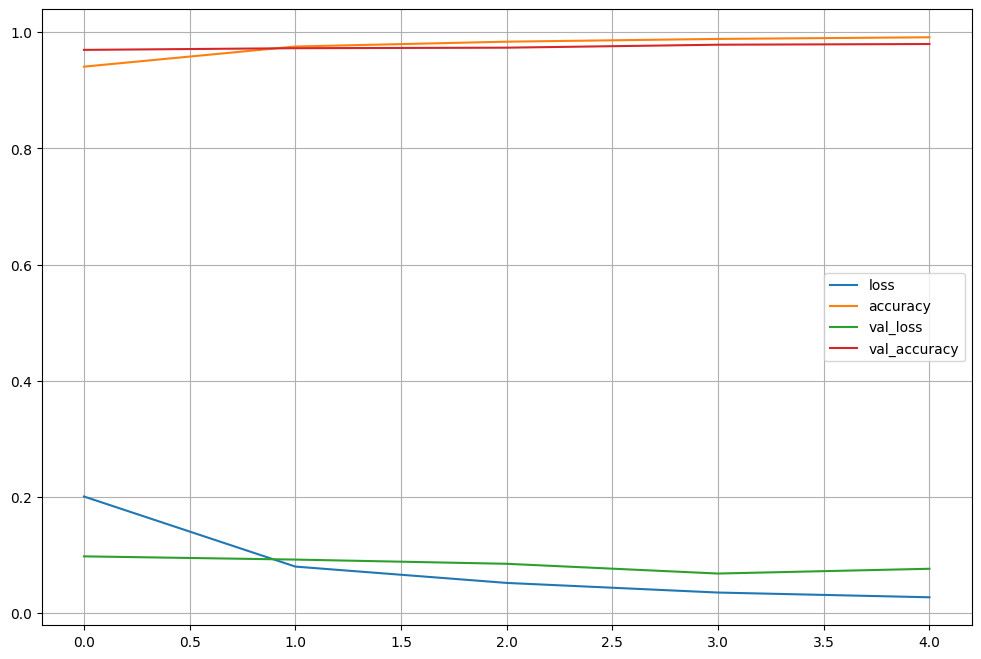

In [ ]:
#7. 그래프로보기
import matplotlib.pyplot as plt

plot_target = ['loss' , 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [ ]:
#8. 테스트

score = model.evaluate(x_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0764 - accuracy: 0.9797
Test Loss : 0.07644981145858765
Test Accuracy  : 0.9797000288963318


In [ ]:
#9. 데이터 예측

import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result,  axis=1)
predicted_labels[:10]

NameError: name 'X_test' is not defined

In [ ]:
#10. 틀린데이터 수 확인

wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

In [ ]:
#11. 틀린데이터 10개 그려보기

import random

samples = random.choices(population=wrong_result, k =10)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(x_test[n].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label ' + str(y_test[n]) + ', Predict ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

In [ ]:
# 12. 모델 저장
model.save('MNIST_ANN_model.h5')

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models
# import time #모델 컴파일 시간 확인

# #1. 데이터 불러오기
# mnist = tf.keras.datasets.mnist

# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train, X_test = X_train / 255.0, X_test / 255.0

# X_train = X_train.reshape((60000, 28 ,28, 1))
# X_test = X_test.reshape((10000, 28 ,28, 1))

# #2. 모델구성
# model = models.Sequential([
#     layers.Conv2D(32, kernel_size=(5, 5),
#                   strides=(1, 1),
#                   padding='same',
#                   activation='relu',
#                   input_shape=(28, 28, 1)),
#     layers.MaxPooling2D(pool_size=(2, 2),
#                         strides=(2, 2)),
#     layers.Conv2D(64, kernel_size=(2, 2),
#                   activation='relu',
#                   padding='same'),
#     layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Dropout(0.25),
#     layers.Flatten(),
#     layers.Dense(1000, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

# model.summary()

# #3. 모델컴파일
# model.compile(optimizer='adam',
#               loss = 'sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# start_time = time.time()

# #4. 모델 훈련
# hist = model.fit(X_train, y_train,
#                  epochs=5,
#                  verbose = 1,
#                  validation_data=(X_test, y_test))
# print(f'Fit Time :{time.time() - start_time}')

# #5. 모델 정확도
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print('테스트 정확도:', test_acc)